# Purpose
Here, we intend to verify that the 1-spingroup Encore algorithms converges to the 2-spingroup Encore algorithms when the one spingroup is very infrequent (i.e. low level-density).

# Importing Modules

In [43]:
import sys
sys.path.append('../')

import Levels_rework2 as Levels
import Results
from RMatrix import PTBayes
import Resonances
from SpinGroups import SpinGroups

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=9, linewidth=130)

In [44]:
%matplotlib widget

# WigBayes Test

#### Gathering Mean Parameters

In [45]:
eps = 0.005 # ...

A  = 181
EB = (1e-5,5000)
pM    = [0.12547, 0.14404]
FreqF = 1.0/6.0
Freq  = [(1-eps)/4.3166, eps/4.3166]
Gnm   = [44.11355, 33.38697]
Ggm   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

# 2 Spingroup Case:
SGs = SpinGroups.make(l, j)
MP2 = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB, FreqF=FreqF)

# 1 Spingroup Case:
SGs = SpinGroups.make(l[:1], j[:1])
MP1 = Resonances.MeanParameters(Freq=Freq[:1], Gnm=Gnm[:1], nDOF=dfn[:1], Ggm=Ggm[:1], gDOF=dfg[:1], A=A, sg=SGs, EB=EB, FreqF=FreqF)

#### Sampler

In [46]:
Res, Types, Missed_Res, Missed_Types = MP2.sample()

#### Running 1-Spingroup WigBayes

In [47]:
Prior, TPPrior = PTBayes(Res, MP1)
distributions = MP1.distributions('Wigner')
runMaster = Levels.RunMaster(Res.E, MP1.EB, Prior, TPPrior, distributions, MP1.FreqF)
Posterior_1, log_total_probability_1 = runMaster.WigBayes(return_log_tot_prob=True, verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


#### Running 2-Spingroup WigBayes

In [48]:
Prior, TPPrior = PTBayes(Res, MP2)
distributions = MP2.distributions('Wigner')
runMaster = Levels.RunMaster(Res.E, MP2.EB, Prior, TPPrior, distributions, MP2.FreqF)
Posterior_2, log_total_probability_2 = runMaster.WigBayes(return_log_tot_prob=True, verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


### Comparison

Average Error for True Probability  = 0.00082
Average Error for False Probability = 0.00217



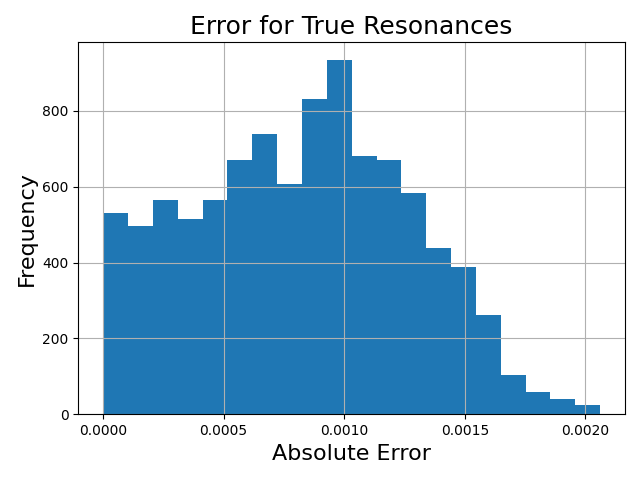

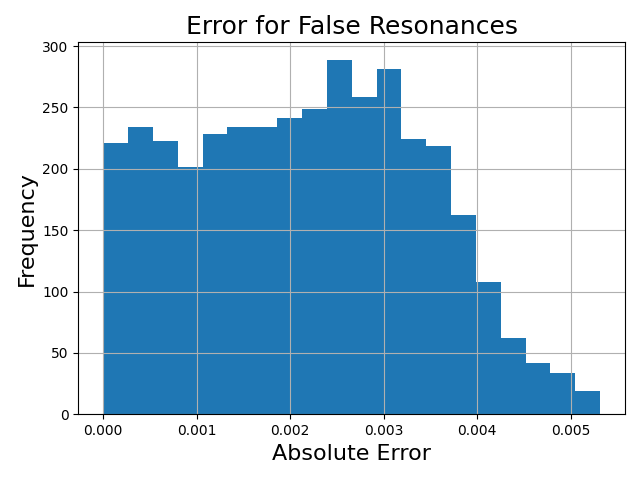

In [51]:
abs_err_true  = abs(Posterior_2[:,0] - Posterior_1[:,0])
abs_err_false = abs(Posterior_2[:,2] - Posterior_1[:,1])

average_err_true  = np.mean(abs_err_true)
average_err_false = np.mean(abs_err_false)

print(f'Average Error for True Probability  = {average_err_true:.5f}')
print(f'Average Error for False Probability = {average_err_false:.5f}')
print()

plt.figure(1)
plt.clf()
plt.hist(abs_err_true, bins=20, density=True)
plt.grid()
plt.title('Error for True Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(2)
plt.clf()
plt.hist(abs_err_false, bins=20, density=True)
plt.grid()
plt.title('Error for False Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

### Comparing Posteriors:

In [50]:
print('True Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,:1], Posterior_2[:,:1]), axis=1))
print()
print('False Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,1:], Posterior_2[:,2:]), axis=1))

True Spingroup Posterior:
[[0.659728 0.658862]
 [0.694645 0.69365 ]
 [0.650156 0.649135]
 [0.508696 0.508311]
 [0.55599  0.554729]
 [0.802261 0.801268]
 [0.857552 0.856801]
 [0.655698 0.654546]
 [0.520303 0.519247]
 ...
 [0.485534 0.485026]
 [0.698271 0.696866]
 [0.519469 0.51796 ]
 [0.5844   0.584727]
 [0.742029 0.741073]
 [0.858345 0.857652]
 [0.640184 0.639259]
 [0.460126 0.459353]
 [0.587572 0.585804]]

False Spingroup Posterior:
[[0.340272 0.339197]
 [0.305355 0.304269]
 [0.349844 0.348513]
 [0.491304 0.488529]
 [0.44401  0.441811]
 [0.197739 0.197212]
 [0.142448 0.142091]
 [0.344302 0.342821]
 [0.479697 0.477056]
 ...
 [0.514466 0.511045]
 [0.301729 0.300723]
 [0.480531 0.478109]
 [0.4156   0.413123]
 [0.257971 0.257182]
 [0.141655 0.141275]
 [0.359816 0.357809]
 [0.539874 0.536242]
 [0.412428 0.410848]]
